In [100]:
from google.colab import drive    #將雲端硬碟與這台機器掛載在一起
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
%cd /content/drive/MyDrive/pandas_GIS/notebook

/content/drive/MyDrive/pandas_GIS/notebook


In [102]:
!pip install geopandas
!pip install mapclassify
!pip install pysal==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import geopandas as gpd
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [104]:
villages_shp = gpd.read_file('../geodata/台灣里界圖_TWD97/Village_NLSC_121_1050219.shp')

In [105]:
villages_shp.head()

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
0,8573,7064,64,64,6401000,6401000-013,中興里,旗津區,高雄市,中興里,"POLYGON ((177607.758 2497521.111, 177630.724 2..."
1,8578,3626,10,10007,1000712,1000712-006,頂潭里,田中鎮,彰化縣,頂潭里,"POLYGON ((207765.541 2641446.581, 207796.390 2..."
2,8579,3627,10,10007,1000712,1000712-007,中潭里,田中鎮,彰化縣,中潭里,"POLYGON ((207195.132 2641217.485, 207196.409 2..."
3,8580,3628,10,10007,1000712,1000712-008,龍潭里,田中鎮,彰化縣,龍潭里,"POLYGON ((206697.079 2641761.284, 206702.181 2..."
4,8581,3642,10,10007,1000712,1000712-022,大社里,田中鎮,彰化縣,大社里,"POLYGON ((206697.079 2641761.284, 206692.842 2..."


In [106]:
import pandas as pd

In [107]:
census_villages = pd.read_csv('../geodata/104年12月人口數.csv', skiprows=[0])   #略過第一列

In [108]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,96歲-男,96歲-女,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,1,0,0,0,0,1,0,0,0,1
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,1,0,0,0,0,0,0,0,0,0
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,0,0,1,0,0
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,0,0,1,1
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,1,0,0,0,0,0,0,0


In [109]:
#為了跟界里圖有相同欄位，所以將csv檔的資料作切割
census_villages['city'] = census_villages['區域別'].copy(deep=True)         #在資料後方新增一個CITY欄位
census_villages['city'] = census_villages['city'].apply(lambda t: t[:3])   #lambda用法:  lambda 引數:運算式   #從頭開始數3個

census_villages['district'] = census_villages['區域別'].copy(deep=True)
census_villages['district'] = census_villages['district'].apply(lambda t: t[3:])     #從後面往前數三個

# census_villages = census_villages[['city', 'district', '村里', '人口數']]

In [110]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女,city,district
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,0,0,0,1,0,0,0,1,新北市,板橋區
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,0,0,0,0,0,0,0,0,新北市,板橋區
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,1,0,0,新北市,板橋區
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,1,1,新北市,板橋區
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,0,0,0,0,0,0,新北市,板橋區


In [111]:
#整合兩份資料，並選擇高雄市的里當作範例
demo_villages = ['惠楠里', '惠民里', '惠豐里', '莒光里', '合群里', '永清里', '橋頭里', '橋南里']
kaohsiung_villages_shp = villages_shp[villages_shp['C_Name']=='高雄市']

kaohsiung_villages_shp = kaohsiung_villages_shp[['C_Name', 'T_Name', 'V_Name', 'geometry']]

demo_villages_shp = kaohsiung_villages_shp[
    kaohsiung_villages_shp['V_Name'].apply(
        lambda t: True if t in demo_villages else False
    )
]



In [112]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [184]:
#計算高雄市這些里的人口數
kaohsiung_census_villages = census_villages[census_villages['city'] == '高雄市']   #先抓出城市是高雄市的

demo_census_villages = kaohsiung_census_villages[kaohsiung_census_villages["村里"].isin(demo_villages)]  #isin() 會傳回布林值去比較，是否跟指定的東西相符

In [186]:
demo_census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女,city,district
3430,10412,高雄市左營區,永清里,503,1288,684,604,17,17,7,...,1,0,0,0,0,0,1,0,高雄市,左營區
3431,10412,高雄市左營區,莒光里,791,2024,1008,1016,7,6,8,...,0,0,0,0,0,0,0,1,高雄市,左營區
3433,10412,高雄市左營區,合群里,1147,2656,1347,1309,6,8,6,...,0,1,0,1,1,1,1,2,高雄市,左營區
3463,10412,高雄市楠梓區,惠楠里,1686,3533,1874,1659,11,8,5,...,0,0,0,1,0,0,0,0,高雄市,楠梓區
3464,10412,高雄市楠梓區,惠民里,1673,4514,2242,2272,20,17,22,...,0,0,0,1,0,0,0,0,高雄市,楠梓區


In [187]:
demo_census_villages = demo_census_villages[['city', 'district', '村里', '人口數']]    #只選取要的欄位名稱

In [188]:
demo_census_villages

,city,district,村里,人口數
3430,高雄市,左營區,永清里,1288
3431,高雄市,左營區,莒光里,2024
3433,高雄市,左營區,合群里,2656
3463,高雄市,楠梓區,惠楠里,3533
3464,高雄市,楠梓區,惠民里,4514
3465,高雄市,楠梓區,惠豐里,5407
4020,高雄市,橋頭區,橋頭里,2550
4021,高雄市,橋頭區,橋南里,1299


In [116]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [191]:
list(demo_villages_shp_group)

[(('高雄市', '左營區'),
       C_Name T_Name V_Name                                           geometry
  16      高雄市    左營區    永清里  POLYGON ((177943.168 2510441.206, 177941.344 2...
  17      高雄市    左營區    莒光里  POLYGON ((177698.008 2511983.979, 177779.229 2...
  2675    高雄市    左營區    合群里  POLYGON ((177309.430 2511593.884, 177310.425 2...),
 (('高雄市', '楠梓區'),
       C_Name T_Name V_Name                                           geometry
  2705    高雄市    楠梓區    惠楠里  POLYGON ((181185.031 2514217.983, 181183.969 2...
  2706    高雄市    楠梓區    惠民里  POLYGON ((180715.716 2514977.993, 180718.122 2...
  2707    高雄市    楠梓區    惠豐里  POLYGON ((179848.500 2515160.500, 179859.625 2...),
 (('高雄市', '橋頭區'),
       C_Name T_Name V_Name                                           geometry
  3208    高雄市    橋頭區    橋頭里  POLYGON ((179476.094 2517763.750, 179443.297 2...
  3209    高雄市    橋頭區    橋南里  POLYGON ((179887.688 2517777.250, 179928.375 2...)]

In [193]:
demo_villages_shp_group = demo_villages_shp.groupby(by=['C_Name', 'T_Name'], as_index=False)    #利用groupby來合併資料區分
demo_villages_shp_group

In [194]:
list(demo_villages_shp_group)  #先轉成list來看內容。    groupby的過程就是將原有的DataFrame按照groupby(by=城市、區)去區分成多個分組的DataFrame

[(('高雄市', '左營區'),
       C_Name T_Name V_Name                                           geometry
  16      高雄市    左營區    永清里  POLYGON ((177943.168 2510441.206, 177941.344 2...
  17      高雄市    左營區    莒光里  POLYGON ((177698.008 2511983.979, 177779.229 2...
  2675    高雄市    左營區    合群里  POLYGON ((177309.430 2511593.884, 177310.425 2...),
 (('高雄市', '楠梓區'),
       C_Name T_Name V_Name                                           geometry
  2705    高雄市    楠梓區    惠楠里  POLYGON ((181185.031 2514217.983, 181183.969 2...
  2706    高雄市    楠梓區    惠民里  POLYGON ((180715.716 2514977.993, 180718.122 2...
  2707    高雄市    楠梓區    惠豐里  POLYGON ((179848.500 2515160.500, 179859.625 2...),
 (('高雄市', '橋頭區'),
       C_Name T_Name V_Name                                           geometry
  3208    高雄市    橋頭區    橋頭里  POLYGON ((179476.094 2517763.750, 179443.297 2...
  3209    高雄市    橋頭區    橋南里  POLYGON ((179887.688 2517777.250, 179928.375 2...)]

Shapely 库是一个非常强大的几何处理工具，可以应用于各种领域的几何计算和分析。
主要用于处理 2D 和 3D 几何对象，例如点、线、多边形、圆等等，提供了一系列的几何操作和方法，比如计算几何对象的面积、长度、交集、缓冲区等等。

Shapely主要应用领域包括地理信息系统（GIS）、地理空间数据分析、建筑设计、交通规划等等

In [118]:
import shapely   

當我們有一個 pandas DataFrame 或者 Series 物件，其中每一欄都包含一個幾何物件，這些幾何物件可能是點、線、面等等。我們想要將每一欄的幾何物件合併成一個單獨的幾何物件，以便我們可以更方便地對其進行處理和分析。

為了實現這個目標，我們可以使用 agg() 方法，將一個函數作為參數傳入。在這個例子中，我們傳入的函數是一個匿名函數 
lambda t: shapely.ops.unary_union(t)，它使用了一個名為 Shapely 的 Python 庫中的 unary_union() 函數，將每一欄中的所有幾何物件合併成一個單獨的幾何物件。

在 Shapely 庫中，ops 是 operation（操作）的縮寫，指的是可以對幾何物件執行的各種操作或功能。ops 模組中包含了許多常見的空間分析操作，例如緩衝、交叉點計算、距離計算、簇合等等。這些操作可以讓我們更方便地進行空間數據的處理和分析。

最終，這個聚合操作會產生一個新的 DataFrame 或者 Series 物件，其中每一欄都包含一個合併後的幾何物件，這樣我們就可以更輕鬆地對其進行操作和分析。

In [119]:
#我們只想看區，所以將相同區的里都合併在一起
demo_district_shp = gpd.GeoDataFrame(
    demo_villages_shp_group['geometry'].agg(lambda t: shapely.ops.unary_union(t)))   #agg()是聚合函數，可以傳回一個函數。
                    #這些資料已經用區 區分完成了                     #將各個區分完成後各別裡面的每一列的geometry合併，最後視為一個一元的座標單位給予t
                                                                  #再利用聚合函數去回傳回去

In [120]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


<Axes: >

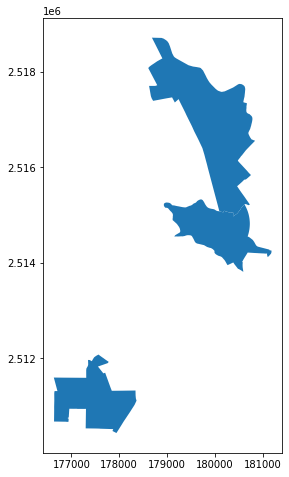

In [121]:
demo_district_shp.plot(figsize=(6,8))

In [122]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [196]:
#合併三個區的人口數 
demo_census_villages_group = demo_census_villages.groupby(by=['city', 'district'], as_index=False)   #將相同區的做groupby()
demo_census_villages_group

In [197]:
list(demo_census_villages_group)

[(('高雄市', '左營區'),      city district   村里   人口數
  3430  高雄市      左營區  永清里  1288
  3431  高雄市      左營區  莒光里  2024
  3433  高雄市      左營區  合群里  2656),
 (('高雄市', '楠梓區'),      city district   村里   人口數
  3463  高雄市      楠梓區  惠楠里  3533
  3464  高雄市      楠梓區  惠民里  4514
  3465  高雄市      楠梓區  惠豐里  5407),
 (('高雄市', '橋頭區'),      city district   村里   人口數
  4020  高雄市      橋頭區  橋頭里  2550
  4021  高雄市      橋頭區  橋南里  1299)]

In [124]:
demo_census_district = demo_census_villages_group['人口數'].sum()

In [125]:
demo_census_district

,city,district,人口數
0,高雄市,左營區,5968
1,高雄市,楠梓區,13454
2,高雄市,橋頭區,3849


In [126]:
demo_district_shp   

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [127]:
demo_census_district_shp = demo_district_shp.merge(
    demo_census_district,left_on=('C_Name', 'T_Name'),right_on=('city', 'district'))    #C_NAME對照city、T_NAME對照district做merge()

In [128]:
demo_census_district_shp

,C_Name,T_Name,geometry,city,district,人口數
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2...",高雄市,左營區,5968
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2...",高雄市,楠梓區,13454
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2...",高雄市,橋頭區,3849


In [129]:
demo_census_district_shp = gpd.GeoDataFrame(demo_census_district_shp)

In [130]:
import matplotlib.pyplot as plt

<Axes: >

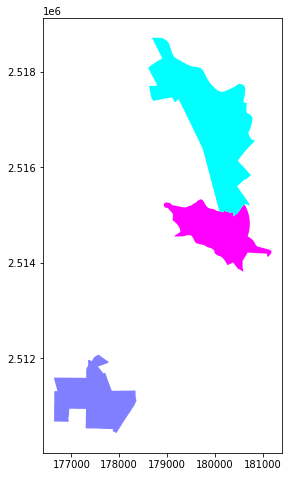

In [131]:
demo_census_district_shp.plot(column='人口數', scheme='QUANTILES', k=3, cmap='cool',figsize=(6,8))  #利用人口數區分畫圖